In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import mlxtend
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


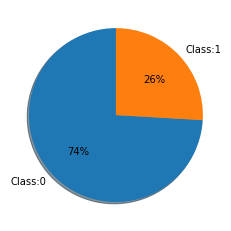

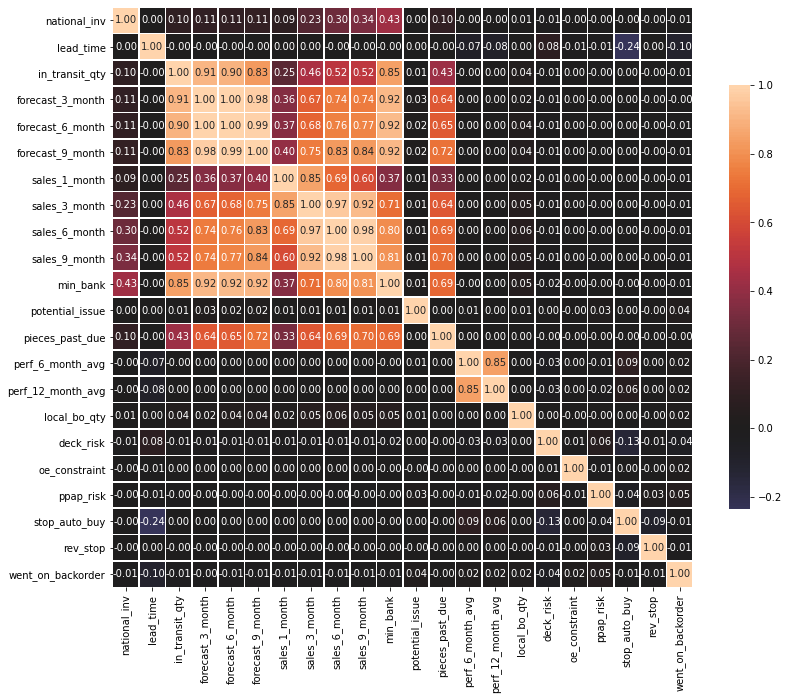

> Class=0: 24708/33356 (74.1%)
> Class=1: 8648/33356 (25.9%)


In [5]:
df = pd.read_csv(r"C:\Users\Evangelia Baou\Documents\Master\Machine Learning\Tyiannak\data.csv") #load dataset
#map binary variables with 'Yes' as 1 and 'No' as 0 
df['stop_auto_buy']= df['stop_auto_buy'].map({'Yes':1, 'No':0})
df['potential_issue']= df['potential_issue'].map({'Yes':1, 'No':0})
df['oe_constraint']= df['oe_constraint'].map({'Yes':1, 'No':0})
df['ppap_risk']= df['ppap_risk'].map({'Yes':1, 'No':0})
df['deck_risk']= df['deck_risk'].map({'Yes':1, 'No':0})
df['rev_stop']= df['rev_stop'].map({'Yes':1, 'No':0})
df['went_on_backorder']= df['went_on_backorder'].map({'Yes':1, 'No':0})
df = df.dropna(how='any',axis=0)  #delete nulls

# pie chart of percentage of two classes
b = df['went_on_backorder'].value_counts()
total_values = []
went_on_backorder = ['Class:0', 'Class:1']
for n in b:
    total_values.append(n)
plt.pie(total_values, labels=went_on_backorder, autopct='%0.f%%', shadow=True,
        startangle=90)  

# Input_ y_Target_Variable. 
y = df['went_on_backorder']
y=y.to_numpy()

#plot correletion matrix

fig, ax = plt.subplots(figsize=(13,13))
corr = df.corr()
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f',
                 square=True, linewidths=.6, annot=True, cbar_kws={"shrink": .60})
plt.show()

#print percentage per class
classes = unique(y)
total = len(y)
for c in classes:
	n_examples = len(y[y==c])
	percent = n_examples / total * 100
	print('> Class=%d: %d/%d (%.1f%%)' % (c, n_examples, total, percent))

del df['went_on_backorder'] #delete target col from df


df[df['national_inv'] < 0] = 0 #set negative values of feture egual to zero
df[df['perf_6_month_avg'] < 0] = np.NaN #set negative values of feture as NaN
df[df['perf_12_month_avg'] < 0] = np.NaN #set negative values of feture as NaN

# Input_x_Features. 
X= df.to_numpy(dtype=float)


> Class=0 in train: 19752/26684 (74.0%)
> Class=1 in train: 6932/26684 (26.0%)
> Class=0 in test: 4956/6672 (74.3%)
> Class=1 in test: 1716/6672 (25.7%)
-----------------------------------------
Prediction results Of SVM
[[4901   55]
 [1538  178]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4956
           1       0.76      0.10      0.18      1716

    accuracy                           0.76      6672
   macro avg       0.76      0.55      0.52      6672
weighted avg       0.76      0.76      0.69      6672



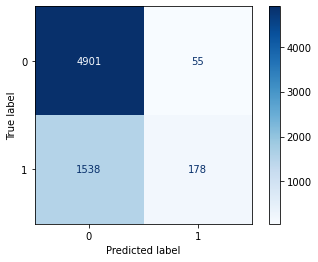

-----------------------------------------
-----------------------------------------
Prediction results Of Random Forest
[[4688  268]
 [ 274 1442]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4956
           1       0.84      0.84      0.84      1716

    accuracy                           0.92      6672
   macro avg       0.89      0.89      0.89      6672
weighted avg       0.92      0.92      0.92      6672



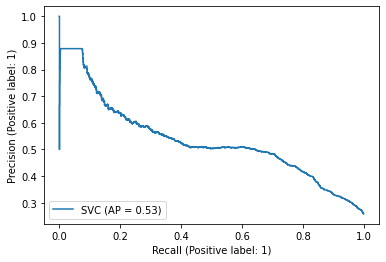

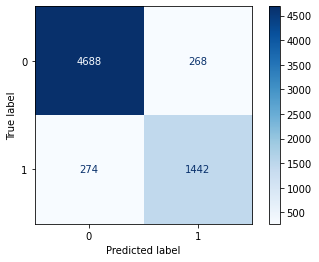

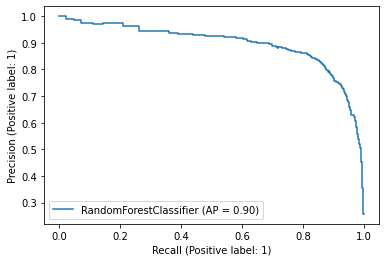

In [12]:
#split dataset in train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
# summarize datasets
classes = unique(y)
total = len(y)
classes_y_train = unique(y_train)
total_y_train = len(y_train)
for c in classes_y_train:
	n_examples = len(y_train[y_train==c])
	percent = n_examples / total_y_train * 100
	print('> Class=%d in train: %d/%d (%.1f%%)' % (c, n_examples, total_y_train, percent))
classes_y_test = unique(y_test)
total_y_test = len(y_test)
for c in classes_y_test:
	n_examples = len(y_test[y_test==c])
	percent = n_examples / total_y_test * 100
	print('> Class=%d in test: %d/%d (%.1f%%)' % (c, n_examples, total_y_test, percent))
imputation=SimpleImputer(strategy='mean')
scaling=StandardScaler()
X_train=imputation.fit_transform(X_train)
X_train=scaling.fit_transform(X_train)
sm=SMOTE(sampling_strategy=0.4)
X_train,y_train=sm.fit_resample(X_train,y_train)
X_test=imputation.transform(X_test)
X_test=scaling.transform(X_test)
model=SVC()
model.fit(X_train, y_train.ravel())
y_pred_svm = model.predict(X_test)
# Evaluate predictions
print('-----------------------------------------')
print('Prediction results Of SVM')
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
disp = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
plt.show()
disp = plot_precision_recall_curve(model, X_test, y_test)
print('-----------------------------------------')
model = RandomForestClassifier()
model.fit(X_train, y_train.ravel())
y_pred_RF = model.predict(X_test)
# Evaluate predictions
print('Prediction results Of Random Forest')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
disp = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
plt.show()
disp = plot_precision_recall_curve(model, X_test, y_test)
print('-----------------------------------------')